In [2]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit_aer.primitives import Sampler
from qiskit.visualization import plot_histogram

In [3]:
n = 2
marked_state = '11'

grover_circuit = QuantumCircuit(n, n)

# 对所有量子比特应用 H 门，创建均匀叠加态
# 这代表我们的“搜索空间”，此时测量到任何结果的概率都是 1/4
grover_circuit.h(range(n))
grover_circuit.barrier() # 使用 barrier() 在视觉上分离电路的不同部分

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=2, num_clbits=0, params=[]), qubits=(<Qubit register=(2, "q"), index=0>, <Qubit register=(2, "q"), index=1>), clbits=())

在量子计算中，编译器会自动优化电路，将相邻的、可以合并的量子门操作合并在一起，以减少总的门数量。添加屏障grover_circuit.barrier()可以告诉编译器：“不要将屏障两边的门操作合并，将它们视为独立的块。”

# cz门

| 输入态 | 控制量子比特（q0） | 目标量子比特（q1） | 是否两个量子比特都为 ∣1⟩？ | 作用 | 输出态 |
| :---: | :---: | :---: | :---: | :--- | :---: |
| ∣00⟩ | ∣0⟩ | ∣0⟩ | 否 | 不做任何操作 | ∣00⟩ |
| ∣01⟩ | ∣0⟩ | ∣1⟩ | 否 | 不做任何操作 | ∣01⟩ |
| ∣10⟩ | ∣1⟩ | ∣0⟩ | 否 | 不做任何操作 | ∣10⟩ |
| ∣11⟩ | ∣1⟩ | ∣1⟩ | 是 | 引入一个 负相位 | −∣11⟩ |

尽管 CNOT 和 CZ 都是纠缠门，但它们的“纠缠方式”不同：

CNOT：通过条件性地改变基态（将 ∣0⟩ 变为 ∣1⟩）来产生纠缠。

CZ：通过条件性地引入相位来产生纠缠。

在量子计算中，这两个门可以相互转换。例如，在 Hadamard 门（H 门）的帮助下，一个 CNOT 门可以等效于一个 CZ 门，反之亦然。这两种门都是构建通用量子计算机不可或缺的基本模块。

In [4]:
# --- 步骤 2: 构建“神谕”(Oracle) ---
grover_circuit.cz(0, 1) # 控制位是 0，目标位是 1
grover_circuit.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=2, num_clbits=0, params=[]), qubits=(<Qubit register=(2, "q"), index=0>, <Qubit register=(2, "q"), index=1>), clbits=())

In [5]:
 #--- 步骤 3: 构建“放大器”(Amplifier/Diffuser) ---
# 这个模块的作用是放大被标记状态的概率幅，同时减小其他状态的概率幅。
# 它的构建步骤是固定的：H -> X -> CZ -> X -> H
grover_circuit.h(range(n))
grover_circuit.x(range(n))
grover_circuit.cz(0, 1)
grover_circuit.x(range(n))
grover_circuit.h(range(n))
grover_circuit.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=2, num_clbits=0, params=[]), qubits=(<Qubit register=(2, "q"), index=0>, <Qubit register=(2, "q"), index=1>), clbits=())

Grover 搜索算法电路 (搜索 '11'):
     ┌───┐ ░     ░ ┌───┐┌───┐   ┌───┐┌───┐ ░ ┌─┐   
q_0: ┤ H ├─░──■──░─┤ H ├┤ X ├─■─┤ X ├┤ H ├─░─┤M├───
     ├───┤ ░  │  ░ ├───┤├───┤ │ ├───┤├───┤ ░ └╥┘┌─┐
q_1: ┤ H ├─░──■──░─┤ H ├┤ X ├─■─┤ X ├┤ H ├─░──╫─┤M├
     └───┘ ░     ░ └───┘└───┘   └───┘└───┘ ░  ║ └╥┘
c: 2/═════════════════════════════════════════╩══╩═
                                              0  1 

模拟结果：
{'11': 1.0}


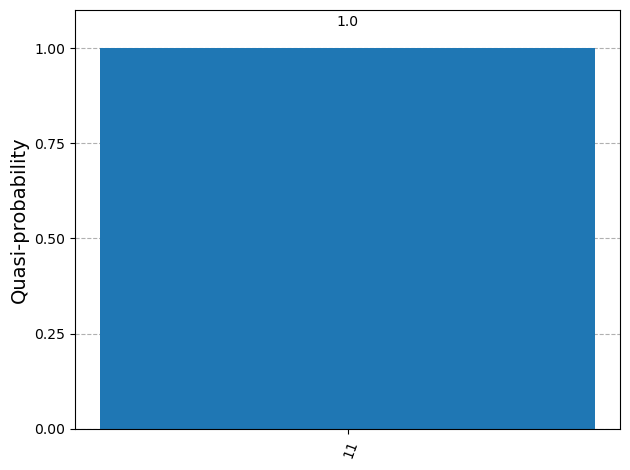

In [6]:
grover_circuit.measure(range(n), range(n))

# --- 打印电路 ---
print("Grover 搜索算法电路 (搜索 '11'):")
print(grover_circuit.draw('text'))


# --- 运行并分析结果 ---
sampler = Sampler()
job = sampler.run(grover_circuit, shots=1024)
result = job.result()
counts = result.quasi_dists[0].binary_probabilities()

print("\n模拟结果：")
print(counts)

# (可选) 绘制结果直方图
plot_histogram(counts)